Gaussian Naive Bayes Training of Data

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import RepeatedStratifiedKFold as RSK, GridSearchCV
from sklearn.preprocessing import PowerTransformer
import warnings
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

GB = GaussianNB()

In [2]:
# Reading the dataset
dataset = pd.read_csv("wdbc.data.csv", sep=",").values

# Forming a data frame 
attributes = ["ID","Diagnosis","mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness","mean_compactness","mean_concavity","mean_concave_points","mean_symmetry","mean_fractal_dimension","se_radius","se_texture","se_perimeter","se_area","se_smoothness","se_compactness","se_concavity","se_concave_points","se_symmetry","se_fractal_dimension",
            "worst_radius","worst_texture","worst_perimeter","worst_area","worst_smoothness","worst_compactness","worst_concavity","worst_concave_points","worst_symmetry","worst_fractal_dimension"]
data = pd.DataFrame(data=dataset,columns=attributes)
data.set_index("ID", inplace=True)

# Displaying the diagnosis(M = malignant, B = benign) and the 30 real-valued attributes
display(data.head())
# Label-1 indicates malignant and Label-0 indicates benign 
data["Diagnosis"] = data["Diagnosis"].replace("M",1)
data["Diagnosis"] = data["Diagnosis"].replace("B",0)
data = data.apply(pd.to_numeric, errors="ignore")

# X contains only the first 10 features i.e only the mean values of the attributes not their standard error or maximum values

# Mean
X1 = dataset[:,2:12]
X1 = X1.astype("float64")
X1 = np.concatenate([np.ones((X1.shape[0],1)),X1],axis=1)
X1Labels = attributes[2:12]

# Standard error
X2 = dataset[:,12:22]
X2 = X2.astype("float64")
X2 = np.concatenate([np.ones((X2.shape[0],1)),X2],axis=1)
X2Labels = attributes[12:22]

# Maximum
X3 = dataset[:,22:32]
X3 = X3.astype("float64")
X3 = np.concatenate([np.ones((X3.shape[0],1)),X3],axis=1)
X3Labels = attributes[22:32]

# Mean and Standard error
X4 = dataset[:,2:22]
X4 = X4.astype("float64")
X4 = np.concatenate([np.ones((X4.shape[0],1)),X4],axis=1)
X4Labels = attributes[2:22]

# Standard error and Maximum
X5 = dataset[:,12:]
X5 = X5.astype("float64")
X5 = np.concatenate([np.ones((X5.shape[0],1)),X5],axis=1)
X5Labels = attributes[12:]

# Mean and Maximum
X6 = np.concatenate([X1,X3],axis=1)
X6 = X6.astype("float64")
X6 = np.concatenate([np.ones((X6.shape[0],1)),X6],axis=1)
X6Labels = np.concatenate([X1Labels, X3Labels])

# Mean, Standard error and Maximum
X7 = dataset[:,2:]
X7 = X7.astype("float64")
X7 = np.concatenate([np.ones((X7.shape[0],1)),X7],axis=1)
X7Labels = attributes[2:]

labels = data["Diagnosis"].values.reshape(-1,1)
data.drop("Diagnosis", axis = 1, inplace = True)
final_data1 = np.concatenate([X1,labels],axis=1)
final_data2 = np.concatenate([X2,labels],axis=1)
final_data3 = np.concatenate([X3,labels],axis=1)
final_data4 = np.concatenate([X4,labels],axis=1)
final_data5 = np.concatenate([X5,labels],axis=1)
final_data6 = np.concatenate([X6,labels],axis=1)
final_data7 = np.concatenate([X7,labels],axis=1)

,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
ID,,,,,,,,,,,,,,,,,,,,,
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678
843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244


In [3]:
def skNBSolver(final_data):
    report = np.zeros([4, 6]) #row, column
    m,n = final_data.shape
    np.random.seed(0)
    
    for i in range(5):
        np.random.shuffle(final_data)
        x_train = final_data[0:int(0.8*m),0:n-1]
        y_train = final_data[0:int(0.8*m),n-1]
        x_test  = final_data[int(0.8*m):,0:n-1]
        y_test  = final_data[int(0.8*m):,n-1]
               
        GB.fit(x_train,y_train)
        
        predictions_train = GB.predict(x_train)
        sk_train_acc = GB.score(x_train,y_train) * 100
        predictions_test = GB.predict(x_test)
        sk_test_acc = GB.score(x_test,y_test) * 100
    
        report[0,i] = (classification_report(y_test,predictions_test, output_dict=True).get('accuracy'))
        report[1,i] = (classification_report(y_test,predictions_test, output_dict=True).get('macro avg').get('precision'))
        report[2,i] =(classification_report(y_test,predictions_test, output_dict=True).get('macro avg').get('recall'))
        report[3,i] =(classification_report(y_test,predictions_test, output_dict=True).get('macro avg').get('f1-score'))
        print(classification_report(y_test,predictions_test))

        cm = metrics.confusion_matrix(y_test, predictions_test)
        print("Confusion matrix:\n",cm)
    
    #reporting the maximum values for each row
    for i in range(4):
        report[i,5]= max(report[i,0:5])
    
    
    columns = ["Validation1","Validation2","Validation3","Validation4","Validation5","Maximum Value"]
    index = ["Accuracy", "Precision", "Recall", "F1 Score"]
    df1 = pd.DataFrame(data = report, columns = columns, index = index)
    display(df1)
    
    ##############
    return sk_train_acc, sk_test_acc

In [4]:
#Mean
sk_train_acc1, sk_test_acc1 = skNBSolver(final_data1)
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc1))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94        75
         1.0       0.97      0.77      0.86        39

    accuracy                           0.91       114
   macro avg       0.93      0.88      0.90       114
weighted avg       0.92      0.91      0.91       114

Confusion matrix:
 [[74  1]
 [ 9 30]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92        71
         1.0       0.90      0.81      0.85        43

    accuracy                           0.89       114
   macro avg       0.90      0.88      0.89       114
weighted avg       0.89      0.89      0.89       114

Confusion matrix:
 [[67  4]
 [ 8 35]]
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93        74
         1.0       0.91      0.80      0.85        40

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.912281,0.894737,0.903509,0.921053,0.921053,0.921053
Precision,0.929654,0.895385,0.906510,0.925573,0.912698,0.929654
Recall,0.877949,0.878808,0.879730,0.889957,0.916973,0.916973
F1 Score,0.896926,0.885733,0.890719,0.904886,0.914749,0.914749



Test accuracy using sklearn: 92.11%



In [5]:
#SE
sk_train_acc2, sk_test_acc2 = skNBSolver(final_data2)
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc2))

              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91        75
         1.0       0.96      0.64      0.77        39

    accuracy                           0.87       114
   macro avg       0.90      0.81      0.84       114
weighted avg       0.88      0.87      0.86       114

Confusion matrix:
 [[74  1]
 [14 25]]
              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88        71
         1.0       0.93      0.63      0.75        43

    accuracy                           0.84       114
   macro avg       0.87      0.80      0.82       114
weighted avg       0.86      0.84      0.83       114

Confusion matrix:
 [[69  2]
 [16 27]]
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87        74
         1.0       0.81      0.62      0.70        40

    accuracy                           0.82       114
   macro avg       0.81      0.77      0.79       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.868421,0.842105,0.815789,0.877193,0.842105,0.877193
Precision,0.901224,0.871400,0.812864,0.873810,0.838336,0.901224
Recall,0.813846,0.799869,0.771959,0.835470,0.812563,0.835470
F1 Score,0.838603,0.817308,0.785234,0.850730,0.822368,0.850730



Test accuracy using sklearn: 84.21%



In [6]:
#Max
sk_train_acc3, sk_test_acc3 = skNBSolver(final_data3)
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc3))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97        75
         1.0       0.93      0.95      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix:
 [[72  3]
 [ 2 37]]
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95        71
         1.0       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion matrix:
 [[68  3]
 [ 4 39]]
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93        74
         1.0       0.91      0.80      0.85        40

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.956140,0.938596,0.903509,0.947368,0.956140,0.956140
Precision,0.948986,0.936508,0.906510,0.945588,0.947403,0.948986
Recall,0.954359,0.932362,0.879730,0.931624,0.960408,0.960408
F1 Score,0.951576,0.934348,0.890719,0.938156,0.953106,0.953106



Test accuracy using sklearn: 95.61%



In [7]:
#Mean and SE
sk_train_acc4, sk_test_acc4 = skNBSolver(final_data4)
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc4))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93        75
         1.0       0.97      0.74      0.84        39

    accuracy                           0.90       114
   macro avg       0.92      0.87      0.89       114
weighted avg       0.91      0.90      0.90       114

Confusion matrix:
 [[74  1]
 [10 29]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        71
         1.0       1.00      0.72      0.84        43

    accuracy                           0.89       114
   macro avg       0.93      0.86      0.88       114
weighted avg       0.91      0.89      0.89       114

Confusion matrix:
 [[71  0]
 [12 31]]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94        74
         1.0       0.94      0.82      0.88        40

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.903509,0.894737,0.921053,0.929825,0.912281,0.929825
Precision,0.923810,0.927711,0.927125,0.941667,0.904778,0.941667
Recall,0.865128,0.860465,0.898986,0.896368,0.904778,0.904778
F1 Score,0.885699,0.879958,0.910588,0.914703,0.904778,0.914703



Test accuracy using sklearn: 91.23%



In [8]:
#SE and Max
sk_train_acc5, sk_test_acc5 = skNBSolver(final_data5)
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc5))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        75
         1.0       1.00      0.85      0.92        39

    accuracy                           0.95       114
   macro avg       0.96      0.92      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion matrix:
 [[75  0]
 [ 6 33]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97        71
         1.0       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix:
 [[70  1]
 [ 4 39]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94        74
         1.0       0.94      0.80      0.86        40

    accuracy                           0.91       114
   macro avg       0.92      0.89      0.90       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.947368,0.956140,0.912281,0.956140,0.964912,0.964912
Precision,0.962963,0.960473,0.920588,0.960157,0.958074,0.962963
Recall,0.923077,0.946446,0.886486,0.938034,0.967257,0.967257
F1 Score,0.939103,0.952638,0.899965,0.948045,0.962302,0.962302



Test accuracy using sklearn: 96.49%



In [9]:
#Mean and Max
sk_train_acc6, sk_test_acc6 = skNBSolver(final_data6)
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc6))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        75
         1.0       0.95      0.90      0.92        39

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion matrix:
 [[73  2]
 [ 4 35]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        71
         1.0       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion matrix:
 [[69  2]
 [ 4 39]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94        74
         1.0       0.94      0.80      0.86        40

    accuracy                           0.91       114
   macro avg       0.92      0.89      0.90       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.947368,0.947368,0.912281,0.947368,0.938596,0.947368
Precision,0.946999,0.948212,0.920588,0.945588,0.928896,0.948212
Recall,0.935385,0.939404,0.886486,0.931624,0.941363,0.941363
F1 Score,0.940789,0.943452,0.899965,0.938156,0.934348,0.943452



Test accuracy using sklearn: 93.86%



In [10]:
#Mean, SE and Max
sk_train_acc7, sk_test_acc7 = skNBSolver(final_data7)
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc7))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.95        75
         1.0       0.97      0.85      0.90        39

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion matrix:
 [[74  1]
 [ 6 33]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        71
         1.0       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion matrix:
 [[71  0]
 [ 6 37]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94        74
         1.0       0.94      0.80      0.86        40

    accuracy                           0.91       114
   macro avg       0.92      0.89      0.90       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.938596,0.947368,0.912281,0.947368,0.938596,0.947368
Precision,0.947794,0.961039,0.920588,0.953887,0.928896,0.961039
Recall,0.916410,0.930233,0.886486,0.924145,0.941363,0.941363
F1 Score,0.929474,0.942230,0.899965,0.937132,0.934348,0.942230



Test accuracy using sklearn: 93.86%



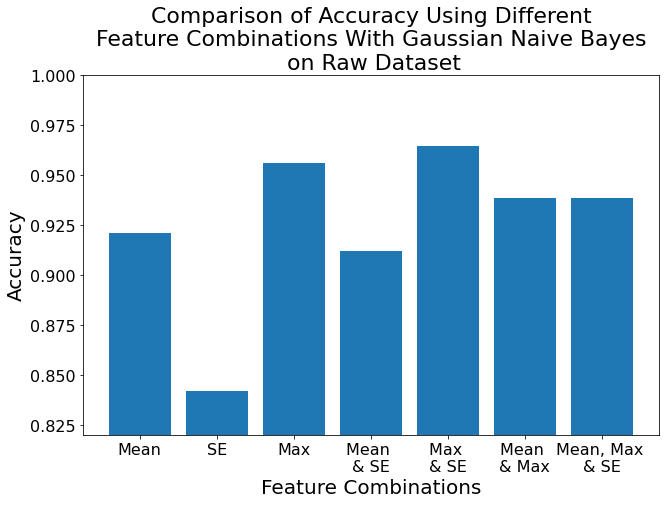

In [11]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
plt.rcParams["font.family"] = "Times New Roman"

feature_comb = ['Mean', 'SE', 'Max', 'Mean \n& SE', 'Max \n& SE', 'Mean \n& Max', 'Mean, Max \n& SE']
accuracy = [sk_test_acc1/100, sk_test_acc2/100, sk_test_acc3/100, sk_test_acc4/100, sk_test_acc5/100, sk_test_acc6/100, sk_test_acc7/100]

ax.bar(feature_comb,accuracy)
ax.set_xlabel('Feature Combinations', fontsize = 20)
ax.set_ylabel('Accuracy', fontsize = 20)
ax.set_title('Comparison of Accuracy Using Different\n Feature Combinations With Gaussian Naive Bayes \n on Raw Dataset', fontsize = 22)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
    
plt.ylim([0.82, 1])
plt.tight_layout()
plt.savefig('Raw Dataset.png', bbox_inches = 'tight', dpi = 200)
plt.show()

In [12]:
# Extracting the columns representing the maximum values of the features
# X = dataset[:,12:]
X5 = X5.astype("float64")
min_val = np.min(X5,axis=0)
max_val = np.max(X5,axis=0)
X5 = np.divide((X5-min_val),(max_val-min_val))
final_data = np.concatenate([X5,labels],axis=1)
m,n = X5.shape

GB = GaussianNB()

for k in range(5):
    max_f1 = 0
    for i in range(2,n):
        for j in range(i+1,n):
            x = np.concatenate((X5[:,i].reshape(-1,1),X5[:,j].reshape(-1,1)),axis=1)
            final_data = np.concatenate([x,labels],axis=1)
            np.random.shuffle(final_data)
            x_train = final_data[0:int(0.8*m),0:2]
            y_train = final_data[0:int(0.8*m),2]
            x_test  = final_data[int(0.8*m):,0:2]
            y_test  = final_data[int(0.8*m):,2]
            
            GB.fit(x_train,y_train)
            predictions = GB.predict(x_test)
            
            p = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('precision')
            r = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('recall')
            
            f1 = (2*r*p)/(r+p)
            if f1>max_f1:
                max_f1 = f1
                index1 = i
                index2 = j
    print("F1 = {}\n".format(max_f1))
    print("Feature Combination:\n{}\n{}\n".format(X5Labels[index1],X5Labels[index2]))
    print("Indices\n{} and {}\n".format(index1,index2))

F1 = 0.9516651480824423

Feature Combination:
worst_compactness
worst_symmetry

Indices
15 and 18

F1 = 0.9814995131450827

Feature Combination:
worst_smoothness
worst_concavity

Indices
14 and 16

F1 = 0.9818297736691107

Feature Combination:
worst_area
worst_symmetry

Indices
13 and 18

F1 = 0.9733000234210322

Feature Combination:
worst_smoothness
worst_fractal_dimension

Indices
14 and 19

F1 = 0.9570063258832537

Feature Combination:
worst_smoothness
worst_concave_points

Indices
14 and 17



In [13]:
for t in range(5):
    max_f1 = 0
    for i in range(2,n):
        for j in range(i+1,n):
            for k in range(j+1,n):
                for l in range(k+1,n):
                            x = np.concatenate((X5[:,i].reshape(-1,1),X5[:,j].reshape(-1,1),X5[:,k].reshape(-1,1),X5[:,l].reshape(-1,1)),axis=1)
                            final_data = np.concatenate([x,labels],axis=1)
                            np.random.shuffle(final_data)
                            x_train = final_data[0:int(0.8*m),0:4]
                            y_train = final_data[0:int(0.8*m),4]
                            x_test  = final_data[int(0.8*m):,0:4]
                            y_test  = final_data[int(0.8*m):,4]
                            
                            GB.fit(x_train,y_train)
                            predictions = GB.predict(x_test)
                            
                            p = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('precision')
                            r = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('recall')
                            f1 = (2*r*p)/(r+p)
                            if f1>max_f1:
                                max_f1 = f1
                                index1 = i
                                index2 = j
                                index3 = k
                                index4 = l
    print("F1 = {}\n".format(max_f1))
    print("Feature Combination:\n{}\n{}\n{}\n{}\n".format(X5Labels[index1],X5Labels[index2],X5Labels[index3],X5Labels[index4]))
    print("Indices\n{}, {}, {}, {}\n".format(index1,index2,index3,index4))

F1 = 1.0

Feature Combination:
worst_texture
worst_perimeter
worst_compactness
worst_fractal_dimension

Indices
11, 12, 15, 19

F1 = 0.9907082891841226

Feature Combination:
se_fractal_dimension
worst_texture
worst_concavity
worst_symmetry

Indices
9, 11, 16, 18

F1 = 1.0

Feature Combination:
se_perimeter
worst_perimeter
worst_smoothness
worst_concave_points

Indices
2, 12, 14, 17

F1 = 1.0

Feature Combination:
worst_texture
worst_perimeter
worst_compactness
worst_fractal_dimension

Indices
11, 12, 15, 19

F1 = 1.0

Feature Combination:
se_perimeter
worst_radius
worst_smoothness
worst_symmetry

Indices
2, 10, 14, 18



In [14]:
# for t in range(5):
#     max_f1 = 0
#     indices = [p for p in range(10)]
#     for i in range(n):
#         for j in range(i+1,n):
#             for k in range(j+1,n):
#                 for l in range(k+1,n):
#                     indices.remove(i)
#                     indices.remove(j)
#                     indices.remove(k)
#                     indices.remove(l)
#                     x = np.concatenate((X[:,indices[0]].reshape(-1,1),X[:,indices[1]].reshape(-1,1),X[:,indices[2]].reshape(-1,1),X[:,indices[3]].reshape(-1,1),X[:,indices[4]].reshape(-1,1),X[:,indices[5]].reshape(-1,1)),axis=1)
#                     final_data = np.concatenate([x,labels],axis=1)
#                     np.random.shuffle(final_data)
#                     x_train = final_data[0:int(0.8*m),0:6]
#                     y_train = final_data[0:int(0.8*m),6]
#                     x_test  = final_data[int(0.8*m):,0:6]
#                     y_test  = final_data[int(0.8*m):,6]
                    
#                     GB.fit(x_train,y_train)
#                     predictions = GB.predict(x_test)
                    
#                     p = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('precision')
#                     r = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('recall')
#                     f1 = (2*r*p)/(r+p)
#                     if f1 > max_f1:
#                         max_f1 = f1
#                         optimal_indices = indices
#                     indices = [p for p in range(10)]
#     print("F1 = {}\n".format(max_f1))
#     for i in optimal_indices:
#         print(X3Labels[i])
#     for i in optimal_indices:
#         print(i)
#     print("\n")

In [15]:
m,n = final_data.shape
print(n)
print(final_data)

5
[[0.31765176 0.50378007 0.14350483 0.0385019  1.        ]
 [0.09592652 0.13477663 0.19929036 0.09930474 0.        ]
 [0.52444089 0.65257732 0.34456929 0.51725043 1.        ]
 ...
 [0.04179712 0.21797251 0.1584861  0.093008   0.        ]
 [0.21118211 0.39862543 0.26000394 0.12245835 1.        ]
 [0.30319489 0.45670103 0.37551745 0.15715598 1.        ]]


In [27]:
import time

def skNBSolver2(final_data, columns):
    report = np.zeros([4, 6]) #row, column
    m,n = final_data.shape
    np.random.seed(0)
    elapsedTime = 0
    for i in range(5):
        np.random.shuffle(final_data)
        x_train = final_data[0:int(0.8*m),columns]
        y_train = final_data[0:int(0.8*m),n-1]
        x_test  = final_data[int(0.8*m):,columns]
        y_test  = final_data[int(0.8*m):,n-1]
        
        start = time.monotonic() * 1000
        
        GB.fit(x_train,y_train)
        predictions_test = GB.predict(x_test)
        stop = time.monotonic() * 1000
        elapsedTime = elapsedTime + (stop - start)
        sk_test_acc = GB.score(x_test,y_test) * 100
        
        
        predictions_train = GB.predict(x_train)
        sk_train_acc = GB.score(x_train,y_train) * 100
        
    
        report[0,i] = (classification_report(y_test,predictions, output_dict=True).get('accuracy'))
        report[1,i] = (classification_report(y_test,predictions, output_dict=True).get('macro avg').get('precision'))
        report[2,i] =(classification_report(y_test,predictions, output_dict=True).get('macro avg').get('recall'))
        report[3,i] =(classification_report(y_test,predictions, output_dict=True).get('macro avg').get('f1-score'))
        print(classification_report(y_test,predictions))

        cm = metrics.confusion_matrix(y_test, predictions)
        print("Confusion matrix:\n",cm)
    
    #reporting the maximum values for each row
    for i in range(4):
        report[i,5]= max(report[i,0:5])
    
    
    columns = ["Validation1","Validation2","Validation3","Validation4","Validation5","Maximum Value"]
    index = ["Accuracy", "Precision", "Recall", "F1 Score"]
    df1 = pd.DataFrame(data = report, columns = columns, index = index)
    display(df1)
    elapsedTime = elapsedTime/5
    
    ##############
    return sk_train_acc, sk_test_acc, elapsedTime

In [17]:
columns = [11, 12, 15, 19]
sk_train_acc_feat, sk_test_acc_feat, elapsedTime = skNBSolver2(final_data5, columns)
print("Test Accuracy using 4 features: ", sk_test_acc_feat)
print("Average Elapsed Time: ", elapsedTime)

              precision    recall  f1-score   support

         0.0       0.60      0.57      0.59        72
         1.0       0.33      0.36      0.34        42

    accuracy                           0.49       114
   macro avg       0.46      0.46      0.46       114
weighted avg       0.50      0.49      0.50       114

Confusion matrix:
 [[41 31]
 [27 15]]
              precision    recall  f1-score   support

         0.0       0.53      0.56      0.55        64
         1.0       0.39      0.36      0.37        50

    accuracy                           0.47       114
   macro avg       0.46      0.46      0.46       114
weighted avg       0.47      0.47      0.47       114

Confusion matrix:
 [[36 28]
 [32 18]]
              precision    recall  f1-score   support

         0.0       0.68      0.58      0.63        79
         1.0       0.28      0.37      0.32        35

    accuracy                           0.52       114
   macro avg       0.48      0.48      0.47       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.491228,0.473684,0.517544,0.578947,0.614035,0.614035
Precision,0.464514,0.460358,0.479540,0.555627,0.592072,0.592072
Recall,0.463294,0.461250,0.476854,0.557540,0.595238,0.595238
F1 Score,0.463312,0.460227,0.473419,0.555844,0.592857,0.592857


Test Accuracy using 4 features:  96.49122807017544
Average Elapsed Time:  0.0


In [18]:
columns = [2, 12, 14, 17]
sk_train_acc_feat, sk_test_acc_feat, elapsedTime = skNBSolver2(final_data5, columns)
print("Test Accuracy using 4 features: ", sk_test_acc_feat)
print("Average Elapsed Time: ", elapsedTime)

              precision    recall  f1-score   support

         0.0       0.68      0.61      0.64        76
         1.0       0.35      0.42      0.38        38

    accuracy                           0.54       114
   macro avg       0.51      0.51      0.51       114
weighted avg       0.57      0.54      0.55       114

Confusion matrix:
 [[46 30]
 [22 16]]
              precision    recall  f1-score   support

         0.0       0.59      0.55      0.57        73
         1.0       0.28      0.32      0.30        41

    accuracy                           0.46       114
   macro avg       0.44      0.43      0.43       114
weighted avg       0.48      0.46      0.47       114

Confusion matrix:
 [[40 33]
 [28 13]]
              precision    recall  f1-score   support

         0.0       0.51      0.53      0.52        66
         1.0       0.33      0.31      0.32        48

    accuracy                           0.44       114
   macro avg       0.42      0.42      0.42       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.543860,0.464912,0.438596,0.500000,0.500000,0.543860
Precision,0.512148,0.435422,0.420396,0.496483,0.475384,0.512148
Recall,0.513158,0.432509,0.421402,0.496610,0.474779,0.513158
F1 Score,0.509921,0.433113,0.420768,0.493412,0.474739,0.509921


Test Accuracy using 4 features:  94.73684210526315
Average Elapsed Time:  0.0


In [19]:
columns = [2, 10, 14, 18]
sk_train_acc_feat, sk_test_acc_feat, elapsedTime = skNBSolver2(final_data5, columns)
print("Test Accuracy using 4 features: ", sk_test_acc_feat)
print("Average Elapsed Time: ", elapsedTime)

              precision    recall  f1-score   support

         0.0       0.74      0.62      0.67        81
         1.0       0.33      0.45      0.38        33

    accuracy                           0.57       114
   macro avg       0.53      0.54      0.53       114
weighted avg       0.62      0.57      0.59       114

Confusion matrix:
 [[50 31]
 [18 15]]
              precision    recall  f1-score   support

         0.0       0.68      0.66      0.67        70
         1.0       0.48      0.50      0.49        44

    accuracy                           0.60       114
   macro avg       0.58      0.58      0.58       114
weighted avg       0.60      0.60      0.60       114

Confusion matrix:
 [[46 24]
 [22 22]]
              precision    recall  f1-score   support

         0.0       0.60      0.59      0.59        70
         1.0       0.37      0.39      0.38        44

    accuracy                           0.51       114
   macro avg       0.49      0.49      0.49       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.570175,0.596491,0.508772,0.508772,0.482456,0.596491
Precision,0.530691,0.577366,0.486253,0.472187,0.446611,0.577366
Recall,0.535915,0.578571,0.486039,0.469017,0.441383,0.578571
F1 Score,0.525444,0.577778,0.485990,0.466756,0.441130,0.577778


Test Accuracy using 4 features:  97.36842105263158
Average Elapsed Time:  0.0


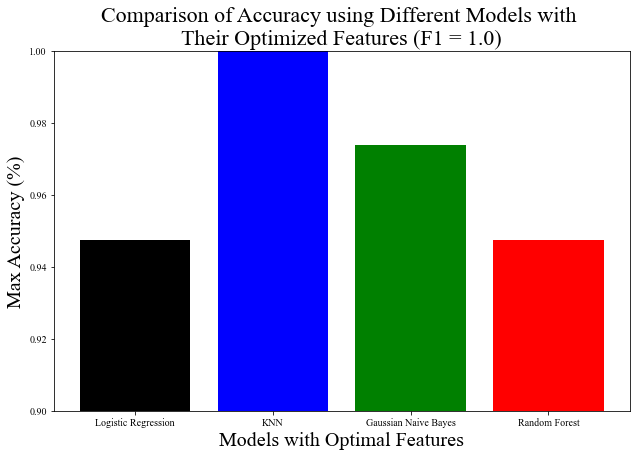

In [25]:
#Graphing accuracy 
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
plt.rcParams["font.family"] = "Times New Roman"

feature_comb = ['Logistic Regression', 'KNN', 'Gaussian Naive Bayes', 'Random Forest']
accuracy = [0.9474, 1.0, .9737, 0.9474]
color=['black', 'blue', 'green', 'red']

ax.bar(feature_comb,accuracy, color = color)

ax.set_xlabel('Models with Optimal Features', fontsize = 20)
ax.set_ylabel('Max Accuracy (%)', fontsize = 20)
ax.set_title('Comparison of Accuracy using Different Models with \nTheir Optimized Features (F1 = 1.0)', fontsize = 22)
plt.ylim([0.90, 1])
plt.tight_layout()
plt.savefig('Graphing Accuracy.png', bbox_inches = 'tight', dpi = 200)
plt.show()

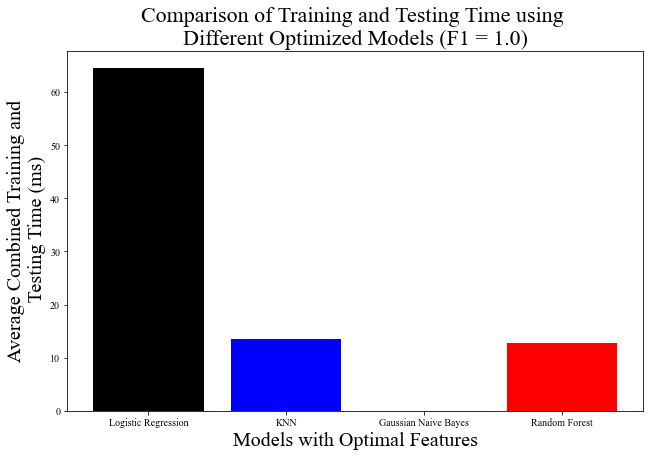

In [24]:
#Graphinig runtime comparisons
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
plt.rcParams["font.family"] = "Times New Roman"

feature_comb = ['Logistic Regression', 'KNN', 'Gaussian Naive Bayes', 'Random Forest']
accuracy = [64.525, 13.48, 0, 12.851]
color=['black', 'blue', 'green', 'red']

ax.bar(feature_comb,accuracy, color = color)
ax.set_xlabel('Models with Optimal Features', fontsize = 20)
ax.set_ylabel('Average Combined Training and\n Testing Time (ms)', fontsize = 20)
ax.set_title('Comparison of Training and Testing Time using \nDifferent Optimized Models (F1 = 1.0)', fontsize = 22)
#plt.ylim([0.90, 1])
plt.tight_layout()
plt.savefig('Runtime Comparisons.png',bbox_inches = 'tight', dpi = 200)
plt.show()